<a href="https://colab.research.google.com/github/Heemang221/covid19/blob/master/SEIR(0924)_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

In [ ]:
## CASE 1. 사랑제일교회 사건부터 시작. (8월 12일~) R0를 3으로 가정한다. (CASE1을 통해 방역을 하지 않았을 때의 확진자를 알 수 있다.)
# The SEIR model differential equations.
def deriv(state, t, N, sigma,beta, gamma):
    S, E, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

R0 is 3


,suseptible,exposed,infected,recovered,day
0,1.372846e+07,19.000000,1687.000000,1490.000000,2020-08-12
1,1.372810e+07,326.140090,1614.630951,1607.428776,2020-08-13
2,1.372776e+07,558.830669,1611.598458,1722.304506,2020-08-14
3,1.372741e+07,744.661817,1658.748024,1838.846645,2020-08-15
4,1.372704e+07,902.203599,1743.727020,1960.165666,2020-08-16
5,1.372666e+07,1044.054342,1858.736491,2088.663131,2020-08-17
6,1.372625e+07,1178.868016,1999.040420,2226.300082,2020-08-18
7,1.372580e+07,1312.703425,2161.978591,2374.778135,2020-08-19
8,1.372532e+07,1449.923021,2346.314357,2535.662857,2020-08-20
9,1.372479e+07,1593.792650,2551.805261,2710.469037,2020-08-21


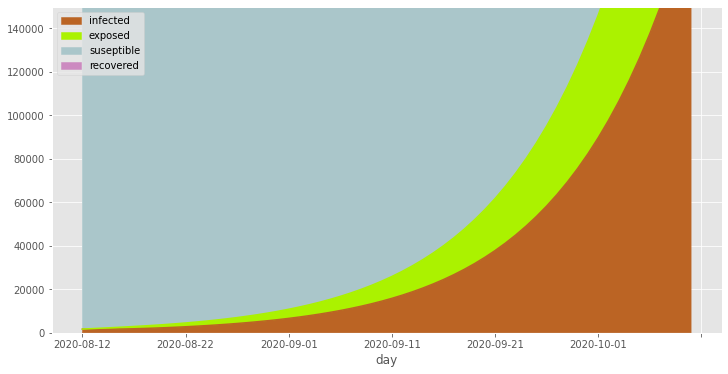

In [ ]:
#R0는 이태원 집단 감염은 2.69, 신천지 집단 감염은 3.53.이므로 임의로 3으로 가정한다.
RO = 3 

latent_period = 1/4 #잠복율 (평균값)
recovery_rate = 1/14 #회복율 (평균값)

#effective_contact_rate = transmission rate * contact rate (감염확률 * 접촉수). 가정한 R0로 베타를 추정한다.
effective_contact_rate = RO * recovery_rate 
print("R0 is", RO)

# 날짜 기준: 8월 12일
total_pop = 13731651
exposed = 19 #검사중
recovered = 1490
infected = 1687
susceptible = total_pop - infected - recovered - exposed

# start date :2020.08.12 
days=range(0,60)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# days를 날짜로 변환
day_delta = timedelta(days=1)
start_date = datetime.strptime("2020-08-12", '%Y-%m-%d').date()
end_date = start_date + 60*day_delta
days=[]
for i in range((end_date - start_date).days):
  days.append(str(start_date + i*day_delta))


# Build a dataframe
df = pd.DataFrame({
    'suseptible': S,
    'exposed':E,
    'infected': I,
    'recovered': R,
    'day': days
})

# 그래프로 나타내기
plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'exposed','suseptible', 'recovered'],
        color=['#bb6424','#abf200', '#aac6ca', '#cc8ac0'],
        kind='area',
        figsize = (12,6),
        ylim = [0,150000],
        stacked=True)

#상세값보기
df.loc[:]

In [ ]:
# CASE1의 가정과 real data를 비교해보자
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
filename = '/content/date.csv'
df3 = pd.read_csv(filename, header=0)
df3.head()
df3 = df3.loc[:, ['days', 'acc_count']]
df3.head()

,days,acc_count
0,0,1686
1,1,1728
2,2,1839
3,3,1917
4,4,1992


In [ ]:
# Build a dataframe because why not
days=range(0,60)
df2 = pd.DataFrame({
    'infected': I,
    'days': days
})

df2.head()

dfdf = pd.merge(df2, df3, on="days")
dfdf.head()

,infected,days,acc_count
0,1687.000000,0,1686
1,1614.630951,1,1728
2,1611.598458,2,1839
3,1658.748024,3,1917
4,1743.727020,4,1992


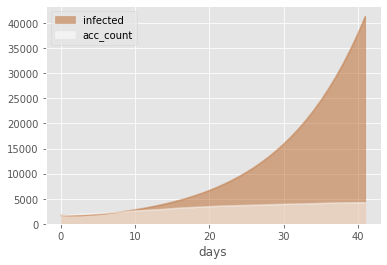

In [ ]:
# 그래프로 비교하기
plt.style.use('ggplot')
dfdf.plot(x= 'days',
        y=['infected', 'acc_count'],
        color=['#bb6424','#a6a6a6'],
        kind='area',
        stacked=False)

In [ ]:
# CASE1-2.감염자 (I) 만 보기

def adjust_rate(contact_rate, day):
    if day > 0:
        return contact_rate
    else:
        return contact_rate

# The SIR model differential equations.
def deriv_adjusted(state, t, N, sigma, beta, gamma):
    S, E, I, R = state
    
    beta = adjust_rate(beta, t)
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

R0 is 3


,infected,infected_lockdown,day
0,1687.000000,1687.000000,2020-08-12
1,1614.630951,1614.630951,2020-08-13
2,1611.598458,1611.598458,2020-08-14
3,1658.748024,1658.748024,2020-08-15
4,1743.727020,1743.727020,2020-08-16
5,1858.736491,1858.736491,2020-08-17
6,1999.040420,1999.040420,2020-08-18
7,2161.978591,2161.978591,2020-08-19
8,2346.314357,2346.314357,2020-08-20
9,2551.805261,2551.805261,2020-08-21


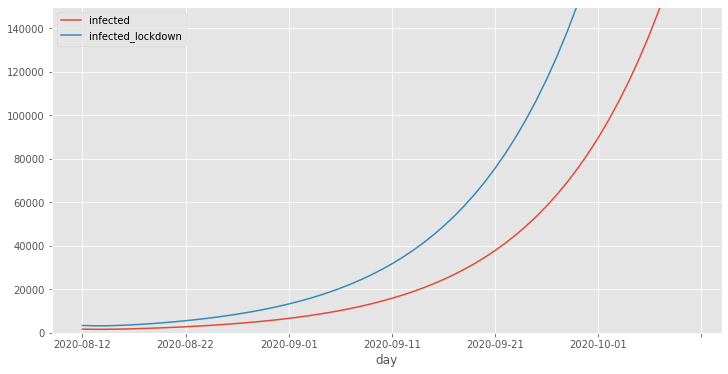

In [ ]:
#R0는 이태원 집단 감염은 2.69, 신천지 집단 감염은 3.53.이므로 임의로 3으로 가정한다.
RO = 3 

latent_period = 1/4 #잠복율 (평균값)
recovery_rate = 1/14 #회복율 (평균값)

#effective_contact_rate = transmission rate * contact rate (감염확률 * 접촉수). 가정한 R0로 베타를 추정한다.
effective_contact_rate = RO * recovery_rate 
print("R0 is", RO)

# 날짜 기준: 8월 12일
total_pop = 13731651
exposed = 19 #검사중
recovered = 1490
infected = 1687
susceptible = total_pop - infected - recovered - exposed

# start date :2020.08.12 
days=range(0,60)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# ...then do it again with the adjusted one.
ret = odeint(deriv_adjusted,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S_adj, E_adj, I_adj, R_adj = ret.T

# days를 날짜로 변환
day_delta = timedelta(days=1)
start_date = datetime.strptime("2020-08-12", '%Y-%m-%d').date()
end_date = start_date + 60*day_delta
days=[]
for i in range((end_date - start_date).days):
  days.append(str(start_date + i*day_delta))

# Build a dataframe
df = pd.DataFrame({
    'infected': I,
    'infected_lockdown': I_adj,
    'day': days
})

# 그래프로 나타내기
plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'infected_lockdown'],
        figsize = (12,6),
        ylim = [0,150000],
        stacked=True)

#상세값보기
df.loc[:]

In [ ]:
## CASE 2. 사회적거리두기 2단계 격상일부터 시작 (9/14일~) R0가 1.3로 가정한다.
# The SIR model differential equations.
def deriv(state, t, N, sigma,beta, gamma):
    S, E, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

R0 is 1.3


,suseptible,exposed,infected,recovered,day
0,1.334470e+07,41.000000,3972.000000,3181.000000,2020-09-14
1,1.334434e+07,347.855477,3747.490524,3456.145041,2020-09-15
2,1.334400e+07,571.942891,3601.830400,3718.226133,2020-09-16
3,1.334367e+07,737.039046,3512.677094,3972.032630,2020-09-17
4,1.334335e+07,860.114681,3464.088267,4220.999391,2020-09-18
5,1.334303e+07,953.283100,3444.689467,4467.594830,2020-09-19
6,1.334271e+07,1025.190897,3446.366406,4713.597867,2020-09-20
7,1.334239e+07,1082.010503,3463.331645,4960.295594,2020-09-21
8,1.334206e+07,1128.148549,3491.458496,5208.624354,2020-09-22
9,1.334174e+07,1166.751435,3527.805614,5459.270437,2020-09-23


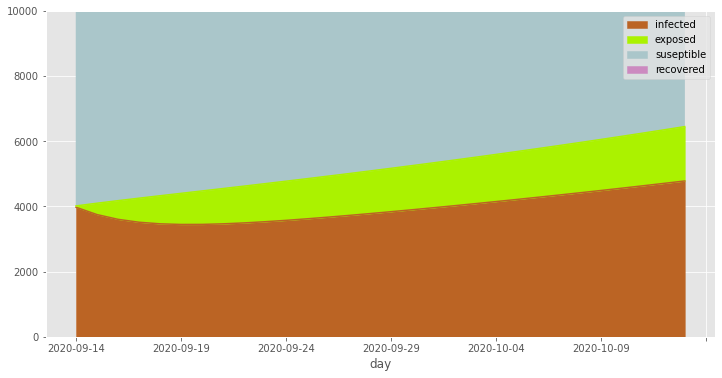

In [ ]:
#R0는 1.3부터 사회적거리두기 2단계로 격상가능하므로 R0를 1.3으로 가정한다.
RO = 1.3

latent_period = 1/4 #잠복율 (평균값)
recovery_rate = 1/14 #회복율 (평균값)

#effective_contact_rate = transmission rate * contact rate (감염확률 * 접촉수). 가정한 R0로 베타를 추정한다.
effective_contact_rate = RO * recovery_rate 
print("R0 is", RO)

# 날짜 기준: 9월 14일
total_pop = 13351891
exposed = 41 #9월 14일 기준 검사중인 사람수 (현재 미지수)
recovered = 3181
infected = 3972
susceptible = total_pop - infected - recovered - exposed

# start date :2020.09.14
days=range(0,30)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# days를 날짜로 변환
day_delta = timedelta(days=1)
start_date = datetime.strptime("2020-09-14", '%Y-%m-%d').date()
end_date = start_date + 30*day_delta
days=[]
for i in range((end_date - start_date).days):
  days.append(str(start_date + i*day_delta))


# Build a dataframe
df = pd.DataFrame({
    'suseptible': S,
    'exposed':E,
    'infected': I,
    'recovered': R,
    'day': days
})

# 그래프로 나타내기
plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'exposed','suseptible', 'recovered'],
        color=['#bb6424','#abf200', '#aac6ca', '#cc8ac0'],
        kind='area',
        figsize = (12,6),
        ylim = [0,10000],
        stacked=True)

#상세값보기
df.loc[:]

In [ ]:
# CASE2-2.감염자 (I) 만 보기

def adjust_rate(contact_rate, day):
    if day > 0:
        return contact_rate
    else:
        return contact_rate

# The SIR model differential equations.
def deriv_adjusted(state, t, N, sigma, beta, gamma):
    S, E, I, R = state
    
    beta = adjust_rate(beta, t)
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

R0 is 1.3


,infected,infected_lockdown,day
0,3972.000000,3972.000000,2020-09-14
1,3747.490524,3747.490524,2020-09-15
2,3601.830400,3601.830400,2020-09-16
3,3512.677094,3512.677094,2020-09-17
4,3464.088267,3464.088267,2020-09-18
5,3444.689467,3444.689467,2020-09-19
6,3446.366406,3446.366406,2020-09-20
7,3463.331645,3463.331645,2020-09-21
8,3491.458496,3491.458496,2020-09-22
9,3527.805614,3527.805614,2020-09-23


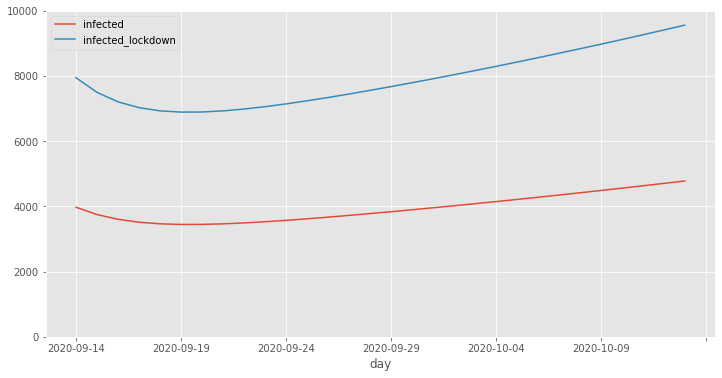

In [ ]:
#R0는 1.3부터 사회적거리두기 2단계로 격상가능하므로 R0를 1.3으로 가정한다.
RO = 1.3

latent_period = 1/4 #잠복율 (평균값)
recovery_rate = 1/14 #회복율 (평균값)

#effective_contact_rate = transmission rate * contact rate (감염확률 * 접촉수). 가정한 R0로 베타를 추정한다.
effective_contact_rate = RO * recovery_rate 
print("R0 is", RO)

# 날짜 기준: 9월 14일
total_pop = 13351891
exposed = 41 #9월 14일 기준 검사중인 사람수 (현재 미지수)
recovered = 3181
infected = 3972
susceptible = total_pop - infected - recovered - exposed

# start date :2020.09.14
days=range(0,30)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# ...then do it again with the adjusted one.
ret = odeint(deriv_adjusted,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S_adj, E_adj, I_adj, R_adj = ret.T

# days를 날짜로 변환
day_delta = timedelta(days=1)
start_date = datetime.strptime("2020-09-14", '%Y-%m-%d').date()
end_date = start_date + 30*day_delta
days=[]
for i in range((end_date - start_date).days):
  days.append(str(start_date + i*day_delta))

# Build a dataframe
df = pd.DataFrame({
    'infected': I,
    'infected_lockdown': I_adj,
    'day': days
})

# 그래프로 나타내기
plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'infected_lockdown'],
        figsize = (12,6),
        ylim = [0,10000],
        stacked=True)

#상세값보기
df.loc[:]


In [ ]:
## CASE 3. (가정) 추석 때 R0는 약 2로 가정
# The SIR model differential equations.
def deriv(state, t, N, sigma,beta, gamma):
    S, E, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

R0 is 2


,suseptible,exposed,infected,recovered,day
0,1.334470e+07,41.000000,3972.000000,3181.000000,2020-09-14
1,1.334415e+07,518.974995,3769.399410,3456.682859,2020-09-15
2,1.334362e+07,873.469955,3680.074212,3722.171177,2020-09-16
3,1.334309e+07,1143.843258,3671.517333,3984.322860,2020-09-17
4,1.334256e+07,1357.347638,3721.391419,4248.059374,2020-09-18
5,1.334203e+07,1532.874599,3814.391788,4516.973222,2020-09-19
6,1.334147e+07,1683.541646,3940.079214,4793.748118,2020-09-20
7,1.334090e+07,1818.479966,4091.382861,5080.449767,2020-09-21
8,1.334030e+07,1944.069752,4263.566206,5378.727253,2020-09-22
9,1.333968e+07,2064.793874,4453.512899,5689.952709,2020-09-23


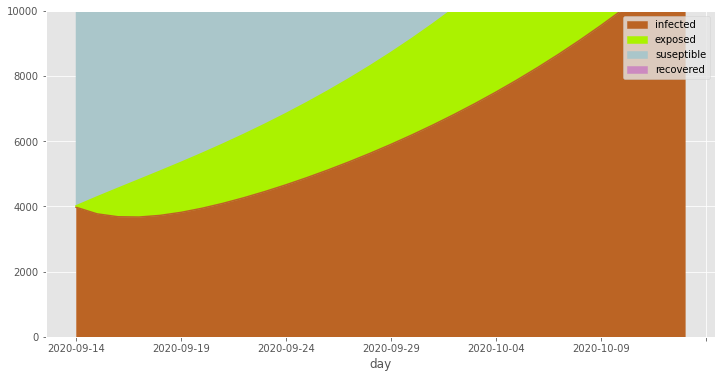

In [ ]:
#R0는 1.31 * 1.5225 (1.5225= 2.1 *0.725) = 1.9944이다. 따라서 2로 가정한다.
RO = 2

latent_period = 1/4 #잠복율 (평균값)
recovery_rate = 1/14 #회복율 (평균값)

#effective_contact_rate = transmission rate * contact rate (감염확률 * 접촉수). 가정한 R0로 베타를 추정한다.
effective_contact_rate = RO * recovery_rate 
print("R0 is", RO)

# 날짜 기준: 9월 14일
total_pop = 13351891
exposed = 41 #9월 14일 기준 검사중인 사람수 (현재 미지수)
recovered = 3181
infected = 3972
susceptible = total_pop - infected - recovered - exposed

# start date :2020.09.14
days=range(0,30)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# days를 날짜로 변환
day_delta = timedelta(days=1)
start_date = datetime.strptime("2020-09-14", '%Y-%m-%d').date()
end_date = start_date + 30*day_delta
days=[]
for i in range((end_date - start_date).days):
  days.append(str(start_date + i*day_delta))


# Build a dataframe
df = pd.DataFrame({
    'suseptible': S,
    'exposed':E,
    'infected': I,
    'recovered': R,
    'day': days
})

# 그래프로 나타내기
plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'exposed','suseptible', 'recovered'],
        color=['#bb6424','#abf200', '#aac6ca', '#cc8ac0'],
        kind='area',
        figsize = (12,6),
        ylim = [0,10000],
        stacked=True)

#상세값보기
df.loc[:]

In [ ]:
# 저장하기
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

In [ ]:
# CASE3-2.감염자 (I) 만 보기

def adjust_rate(contact_rate, day):
    if day > 0:
        return contact_rate
    else:
        return contact_rate

# The SIR model differential equations.
def deriv_adjusted(state, t, N, sigma, beta, gamma):
    S, E, I, R = state
    
    beta = adjust_rate(beta, t)
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

R0 is 2


,infected,infected_lockdown,day
0,3972.000000,3972.000000,2020-09-14
1,3769.399410,3769.399410,2020-09-15
2,3680.074212,3680.074212,2020-09-16
3,3671.517333,3671.517333,2020-09-17
4,3721.391419,3721.391419,2020-09-18
5,3814.391788,3814.391788,2020-09-19
6,3940.079214,3940.079214,2020-09-20
7,4091.382861,4091.382861,2020-09-21
8,4263.566206,4263.566206,2020-09-22
9,4453.512899,4453.512899,2020-09-23


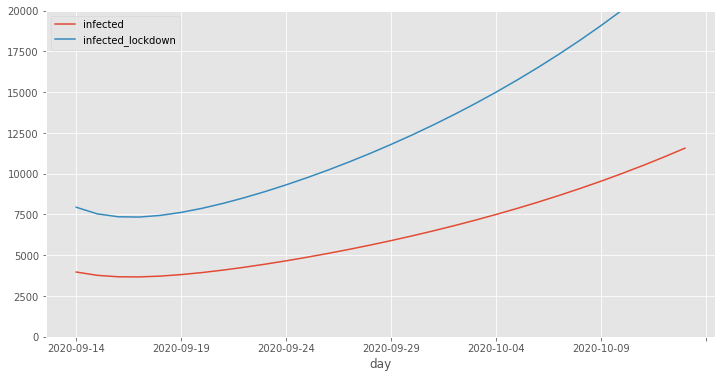

In [ ]:
#R0는 1.3부터 사회적거리두기 2단계로 격상가능하므로 R0를 1.3으로 가정한다.
RO = 1.3

latent_period = 1/4 #잠복율 (평균값)
recovery_rate = 1/14 #회복율 (평균값)

#effective_contact_rate = transmission rate * contact rate (감염확률 * 접촉수). 가정한 R0로 베타를 추정한다.
effective_contact_rate = RO * recovery_rate 
print("R0 is", RO)

# 날짜 기준: 9월 14일
total_pop = 13351891
exposed = 41 #9월 14일 기준 검사중인 사람수 (현재 미지수)
recovered = 3181
infected = 3972
susceptible = total_pop - infected - recovered - exposed

# start date :2020.09.14
days=range(0,30)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# ...then do it again with the adjusted one.
ret = odeint(deriv_adjusted,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S_adj, E_adj, I_adj, R_adj = ret.T

# days를 날짜로 변환
day_delta = timedelta(days=1)
start_date = datetime.strptime("2020-09-14", '%Y-%m-%d').date()
end_date = start_date + 30*day_delta
days=[]
for i in range((end_date - start_date).days):
  days.append(str(start_date + i*day_delta))

# Build a dataframe
df = pd.DataFrame({
    'infected': I,
    'infected_lockdown': I_adj,
    'day': days
})

# 그래프로 나타내기
plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'infected_lockdown'],
        figsize = (12,6),
        ylim = [0,20000],
        stacked=True)

#상세값보기
df.loc[:]

In [ ]:
## CASE 4. 개인방역 vs 사회적거리두기 (어떤게 더 효과가 좋을까?)
# A.손씻기를 철저히 한다.

def adjust_rate(contact_rate, day):
    if day > 0:
        return contact_rate
    else:
        return contact_rate

# The SIR model differential equations.
def deriv_adjusted(state, t, N, sigma, beta, gamma):
    S, E, I, R = state
    
    beta = adjust_rate(beta, t)
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

R is 1.75


,infected_a,infected_lockdown_a,date_a
0,3972.000000,3972.000000,2020-09-14
1,3761.569671,3761.569671,2020-09-15
2,3652.057767,3652.057767,2020-09-16
3,3614.465646,3614.465646,2020-09-17
4,3628.589719,3628.589719,2020-09-18
5,3680.372256,3680.372256,2020-09-19
6,3760.050857,3760.050857,2020-09-20
7,3860.865833,3860.865833,2020-09-21
8,3978.157336,3978.157336,2020-09-22
9,4108.734714,4108.734714,2020-09-23


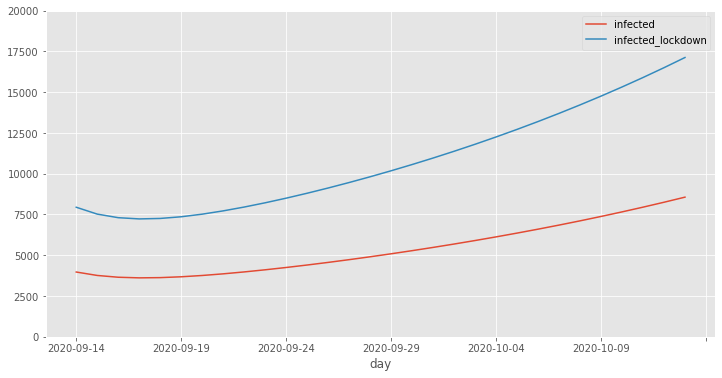

In [ ]:
# R0는 추석예측량인 2로 가정
R0 = 2
# 50%의 인구가 손씻기를 철저히하여 감염의 위험이 줄었다고 가정한다.
pop=0.5
# 손씻기 감염 방지 효과 (연구에 따르면, 손 씻기로 호흡기 감염의 위험이 6%에서 44%까지 감소. 합동분산 24% (95% CI 6–40%)로 합동분산편차를 25%로 반올림)
p = 0.25 * pop
R = R0 *(1-p)

latent_period = 1/4 #잠복율 (평균값)
recovery_rate = 1/14 #회복율 (평균값)

#effective_contact_rate = transmission rate * contact rate (감염확률 * 접촉수). 가정한 R0로 베타를 추정한다.
effective_contact_rate = R * recovery_rate 
print("R is", R)

# 날짜 기준: 9월 14일
total_pop = 13351891
exposed = 41 #9월 14일 기준 검사중인 사람수 (현재 미지수)
recovered = 3181
infected = 3972
susceptible = total_pop - infected - recovered - exposed

# start date :2020.09.14
days=range(0,30)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# ...then do it again with the adjusted one.
ret = odeint(deriv_adjusted,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S_adj, E_adj, I_adj, R_adj = ret.T

# days를 날짜로 변환
day_delta = timedelta(days=1)
start_date = datetime.strptime("2020-09-14", '%Y-%m-%d').date()
end_date = start_date + 30*day_delta
days=[]
for i in range((end_date - start_date).days):
  days.append(str(start_date + i*day_delta))

# Build a dataframe
df_a = pd.DataFrame({
    'infected': I,
    'infected_lockdown': I_adj,
    'day': days
})

# 그래프로 나타내기
plt.style.use('ggplot')
df_a.plot(x='day',
        y=['infected', 'infected_lockdown'],
        figsize = (12,6),
        ylim = [0,20000],
        stacked=True)

#상세값보기
df_a.columns = ['infected_a', 'infected_lockdown_a', 'date_a']
df_a.loc[:]

In [ ]:
# B.사회적 거리두기 정책을 실시하여 접촉률을 줄인다.

def adjust_rate(contact_rate, day):
    if day > 0:
        return contact_rate
    else:
        return contact_rate

# The SIR model differential equations.
def deriv_adjusted(state, t, N, sigma, beta, gamma):
    S, E, I, R = state
    
    beta = adjust_rate(beta, t)
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

R is 1.3


,infected_b,infected_lockdown_b,date_b
0,3972.000000,3972.000000,2020-09-14
1,3747.490524,3747.490524,2020-09-15
2,3601.830400,3601.830400,2020-09-16
3,3512.677094,3512.677094,2020-09-17
4,3464.088267,3464.088267,2020-09-18
5,3444.689467,3444.689467,2020-09-19
6,3446.366406,3446.366406,2020-09-20
7,3463.331645,3463.331645,2020-09-21
8,3491.458496,3491.458496,2020-09-22
9,3527.805614,3527.805614,2020-09-23


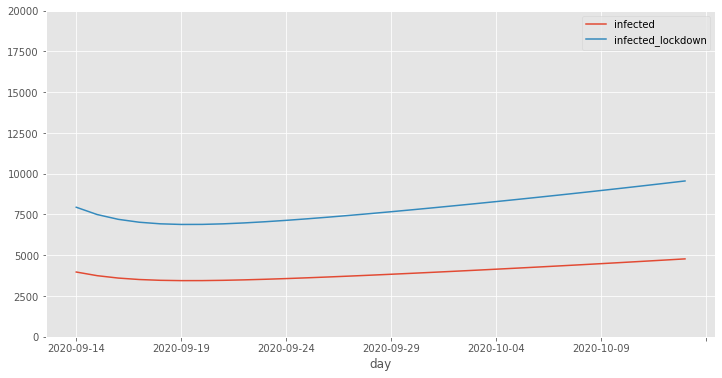

In [ ]:
# R0는 추석예측량인 2로 가정
R0 = 2
# 50%의 인구가 사회적거리두기 수칙을 철저히 지켰다고 가정한다.
pop=0.5
# 사회적 거리두기 효과 (연구에 따르면,  사회적 거리두기를 통해 코로나19 확산을 아무런 통제가 없을 때와 비교해 최대 99.3%까지 줄일 수 있다. 평균 평균 일일 접촉 대상의 수는 73% 감소하므로 70%로 가정한다.)
p = 0.70 * pop
R = R0 *(1-p)

latent_period = 1/4 #잠복율 (평균값)
recovery_rate = 1/14 #회복율 (평균값)

#effective_contact_rate = transmission rate * contact rate (감염확률 * 접촉수). 가정한 R0로 베타를 추정한다.
effective_contact_rate = R * recovery_rate 
print("R is", R)

# 날짜 기준: 9월 14일
total_pop = 13351891
exposed = 41 #9월 14일 기준 검사중인 사람수 (현재 미지수)
recovered = 3181
infected = 3972
susceptible = total_pop - infected - recovered - exposed

# start date :2020.09.14
days=range(0,30)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# ...then do it again with the adjusted one.
ret = odeint(deriv_adjusted,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S_adj, E_adj, I_adj, R_adj = ret.T

# days를 날짜로 변환
day_delta = timedelta(days=1)
start_date = datetime.strptime("2020-09-14", '%Y-%m-%d').date()
end_date = start_date + 30*day_delta
days=[]
for i in range((end_date - start_date).days):
  days.append(str(start_date + i*day_delta))

# Build a dataframe
df_b = pd.DataFrame({
    'infected': I,
    'infected_lockdown': I_adj,
    'day': days
})

# 그래프로 나타내기
plt.style.use('ggplot')
df_b.plot(x='day',
        y=['infected', 'infected_lockdown'],
        figsize = (12,6),
        ylim = [0,20000],
        stacked=True)

#상세값보기
df_b.columns = ['infected_b', 'infected_lockdown_b', 'date_b']
df_b.loc[:]

In [ ]:
# C.개인방역 + 사회적 거리두기 정책을 실시한다.

def adjust_rate(contact_rate, day):
    if day > 0:
        return contact_rate
    else:
        return contact_rate

# The SIR model differential equations.
def deriv_adjusted(state, t, N, sigma, beta, gamma):
    S, E, I, R = state
    
    beta = adjust_rate(beta, t)
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

R is 1.1375


,infected_c,infected_lockdown_c,date
0,3972.000000,3972.000000,2020-09-14
1,3742.410931,3742.410931,2020-09-15
2,3583.756511,3583.756511,2020-09-16
3,3476.204635,3476.204635,2020-09-17
4,3405.481753,3405.481753,2020-09-18
5,3361.315001,3361.315001,2020-09-19
6,3336.310949,3336.310949,2020-09-20
7,3325.148589,3325.148589,2020-09-21
8,3323.998527,3323.998527,2020-09-22
9,3330.104938,3330.104938,2020-09-23


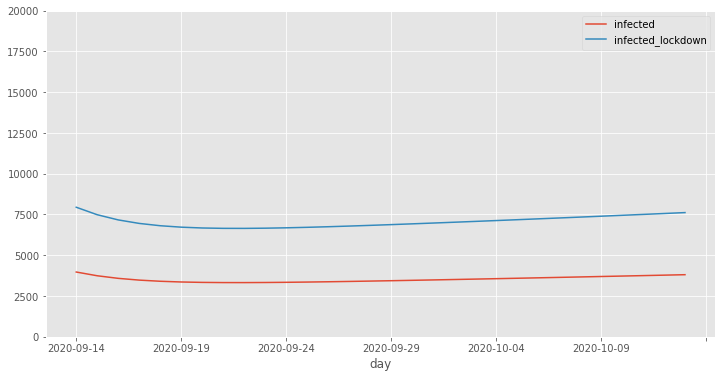

In [ ]:
# R0는 추석예측량인 2로 가정
R0 = 2
# 50%의 인구가 사회적거리두기 수칙을 철저히 지켰다고 가정한다.
pop=0.5
# 손씻기 감염 방지 효과 (연구에 따르면, 손 씻기로 호흡기 감염의 위험이 6%에서 44%까지 감소. 합동분산 24% (95% CI 6–40%)로 합동분산편차를 25%로 반올림)
p1 = 0.25 * pop
# 사회적 거리두기 효과 (연구에 따르면,  사회적 거리두기를 통해 코로나19 확산을 아무런 통제가 없을 때와 비교해 최대 99.3%까지 줄일 수 있다. 평균 평균 일일 접촉 대상의 수는 73% 감소하므로 70%로 가정한다.)
p2 = 0.70 * pop
R = R0 *(1-p1) * (1-p2)

latent_period = 1/4 #잠복율 (평균값)
recovery_rate = 1/14 #회복율 (평균값)

#effective_contact_rate = transmission rate * contact rate (감염확률 * 접촉수). 가정한 R0로 베타를 추정한다.
effective_contact_rate = R * recovery_rate 
print("R is", R)

# 날짜 기준: 9월 14일
total_pop = 13351891
exposed = 41 #9월 14일 기준 검사중인 사람수 (현재 미지수)
recovered = 3181
infected = 3972
susceptible = total_pop - infected - recovered - exposed

# start date :2020.09.14
days=range(0,30)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# ...then do it again with the adjusted one.
ret = odeint(deriv_adjusted,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S_adj, E_adj, I_adj, R_adj = ret.T

# days를 날짜로 변환
day_delta = timedelta(days=1)
start_date = datetime.strptime("2020-09-14", '%Y-%m-%d').date()
end_date = start_date + 30*day_delta
days=[]
for i in range((end_date - start_date).days):
  days.append(str(start_date + i*day_delta))

# Build a dataframe
df_c = pd.DataFrame({
    'infected': I,
    'infected_lockdown': I_adj,
    'day': days
})

# 그래프로 나타내기
plt.style.use('ggplot')
df_c.plot(x='day',
        y=['infected', 'infected_lockdown'],
        figsize = (12,6),
        ylim = [0,20000],
        stacked=True)

#상세값보기
df_c.columns = ['infected_c', 'infected_lockdown_c', 'date']
df_c.loc[:]


## CASE 4 결론
#1. 개인방역 역시 중요하지만, 사회적 거리두기 정책처럼 접촉률 자체가 낮아지는 정책을 펼치는 것이 현재로서는 감염자수를 줄일 수 있는 가장 좋은 방법이다.
#2. 전체 인구 60%만이라도 두 가지 모두를 잘 지킨다면 R이 1 이하로 떨어지게 된다.(재생산지수 0.9860으로 1보다 낮아짐)


In [ ]:
# 데이터 전처리
df_all=pd.concat([df_a,df_b,df_c], axis=1)
df_all.drop(['date_a', 'date_b'], axis='columns', inplace=True)
df_all.columns = ['infected_a', 'R = 1.75','infected_b','R = 1.3','infected_c','R = 1.14','date']
df_all.loc[:]

,infected_a,R = 1.75,infected_b,R = 1.3,infected_c,R = 1.14,date
0,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,2020-09-14
1,3761.569671,3761.569671,3747.490524,3747.490524,3742.410931,3742.410931,2020-09-15
2,3652.057767,3652.057767,3601.830400,3601.830400,3583.756511,3583.756511,2020-09-16
3,3614.465646,3614.465646,3512.677094,3512.677094,3476.204635,3476.204635,2020-09-17
4,3628.589719,3628.589719,3464.088267,3464.088267,3405.481753,3405.481753,2020-09-18
5,3680.372256,3680.372256,3444.689467,3444.689467,3361.315001,3361.315001,2020-09-19
6,3760.050857,3760.050857,3446.366406,3446.366406,3336.310949,3336.310949,2020-09-20
7,3860.865833,3860.865833,3463.331645,3463.331645,3325.148589,3325.148589,2020-09-21
8,3978.157336,3978.157336,3491.458496,3491.458496,3323.998527,3323.998527,2020-09-22
9,4108.734714,4108.734714,3527.805614,3527.805614,3330.104938,3330.104938,2020-09-23


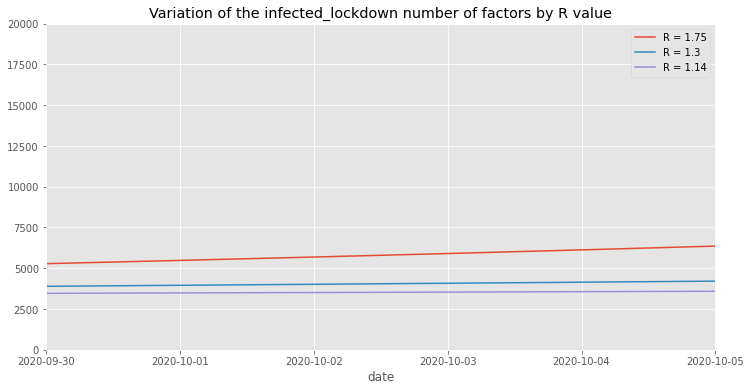

In [ ]:
# R값 그래프로 비교하기
plt.style.use('ggplot')
df_all.plot(x='date',
        y= ['R = 1.75','R = 1.3','R = 1.14'],
        title= "Variation of the infected_lockdown number of factors by R value",
        figsize = (12,6),
        xlim = [16,21],
        ylim = [0,20000])

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

KeyboardInterrupt: ignored